# Medical insurance premium prediction

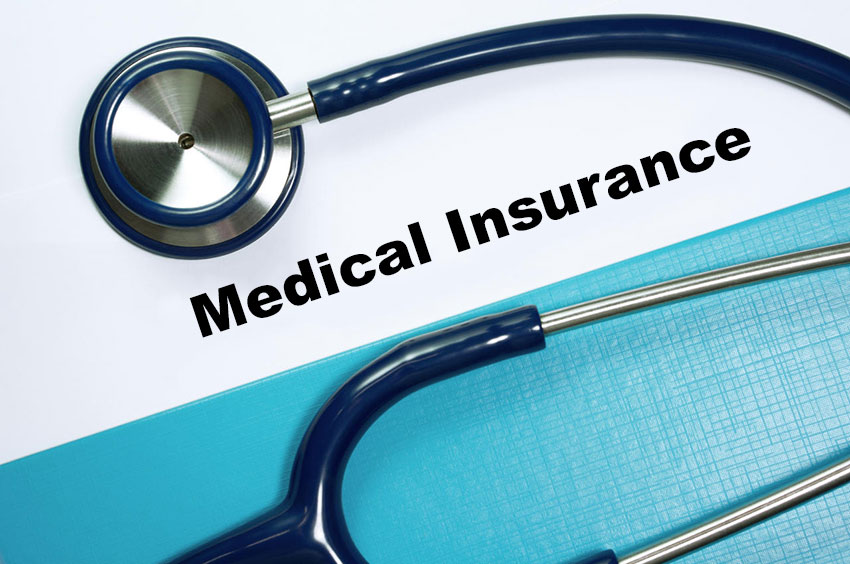

About Dataset
Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Acknowledgements
The dataset is available on GitHub here.

Inspiration
Can you accurately predict insurance costs?

# Importing the libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm,skew,kurtosis

In [2]:
df= pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dataset does not contain any null value

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


 These two are duplicates of one another i.e row 195 & 581

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
numcol=df.select_dtypes(['int64','float64']).columns
numcol

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [13]:
objcol=df.select_dtypes('object').columns
objcol

Index(['sex', 'smoker', 'region'], dtype='object')

# Features

# Age

#### age of primary beneficiary

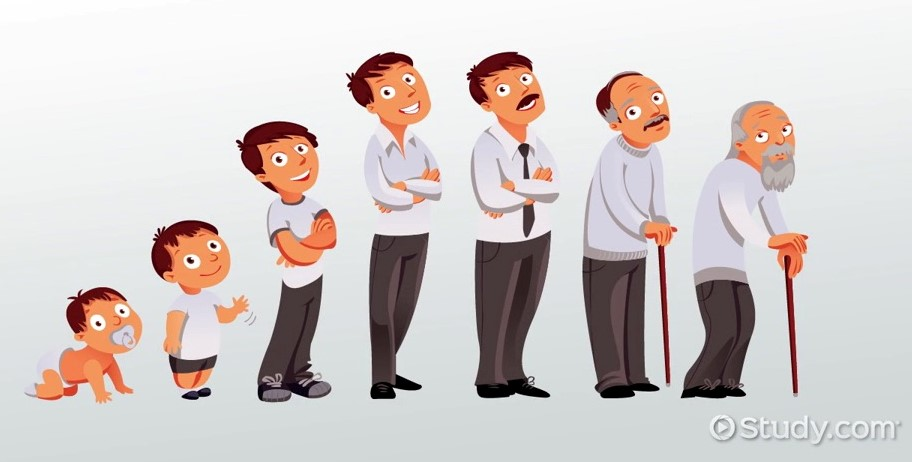

In [14]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Mean and Median Value are almost Similar

In [15]:
df['age'].value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Text(0, 0.5, 'Count')

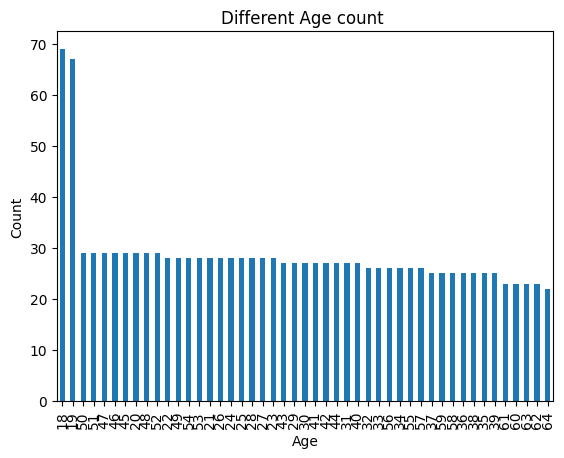

In [16]:
df['age'].value_counts().plot(kind='bar',title='Different Age count ')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'Distribution of Age')

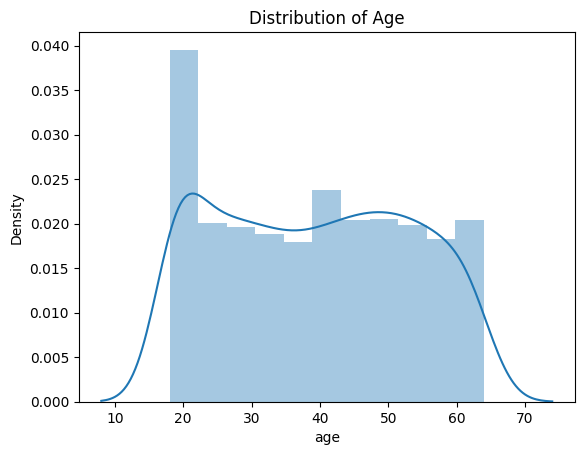

In [17]:
sns.distplot(df['age'])
plt.title('Distribution of Age')

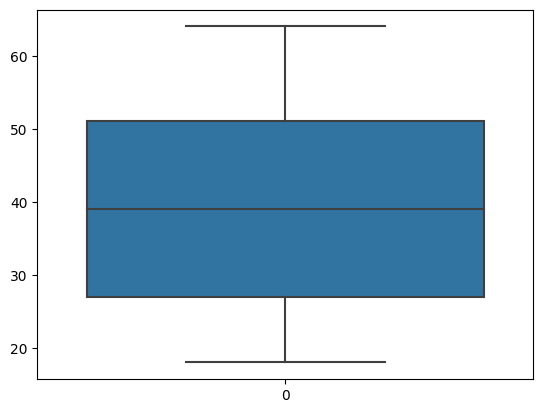

In [18]:
ax= sns.boxplot(df['age'])
for container in ax.containers:
    ax.bar_label(container)

Age range 18-64

Minimum age in dataset is 18.

maximum age in dataset in 64.

Average age in dataset is 39.

People between the ages of 18 and 19 have the most medical insurance.

# Gender

#### insurance contractor gender, female, male

In [19]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [20]:
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


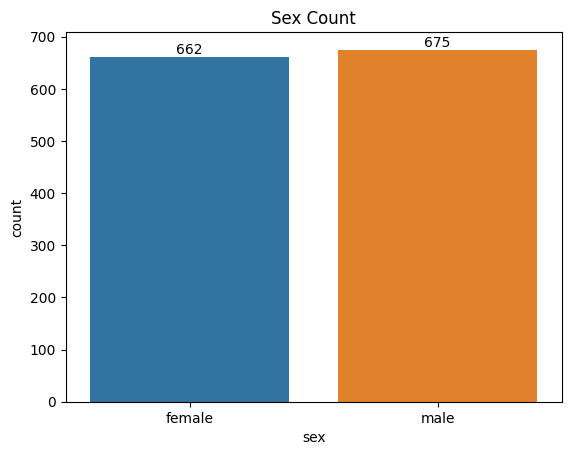

In [21]:
ax=sns.countplot(data=df,x='sex');
plt.title('Sex Count')
for container in ax.containers:
    ax.bar_label(container)

##### Male and female counts are almost equal.

# Smoker

- Smoking Yes/ NO

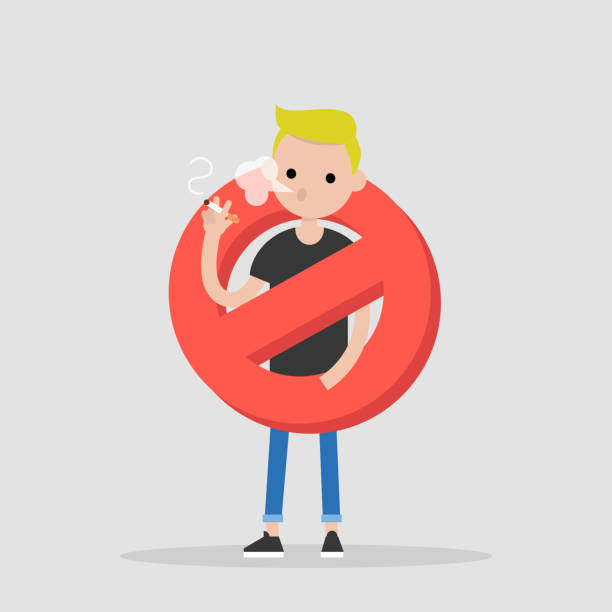

In [22]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [23]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


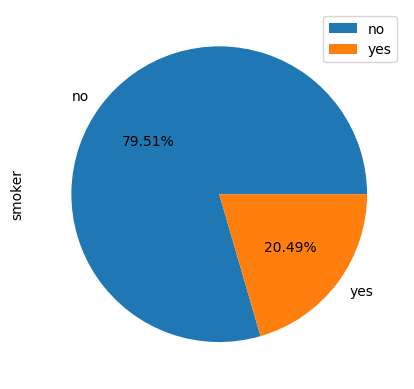

In [32]:
df['smoker'].value_counts(normalize=True).plot(kind='pie',autopct="%1.2f%%");
plt.legend()

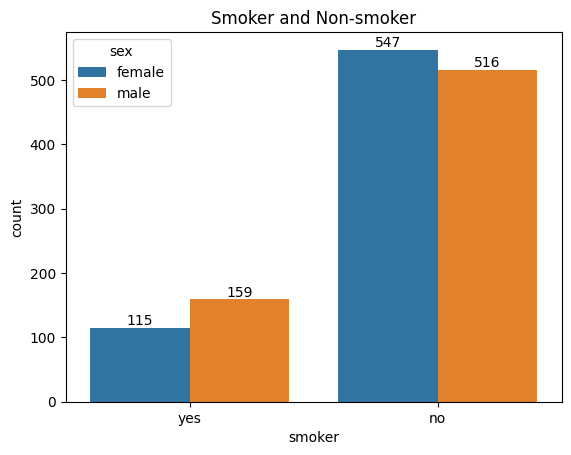

In [33]:
ax=sns.countplot(data=df,x='smoker',hue='sex');
plt.title('Smoker and Non-smoker')
for container in ax.containers:
    ax.bar_label(container)

#### From above, we can see that nearly 80% of people do not smoke, while the remaining 20% do, and that men outnumber women.

 

# Region

#### The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

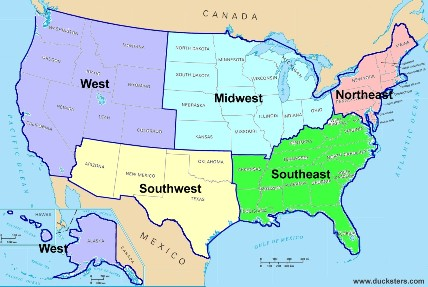

In [26]:
df['region'].value_counts().index

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')

In [27]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

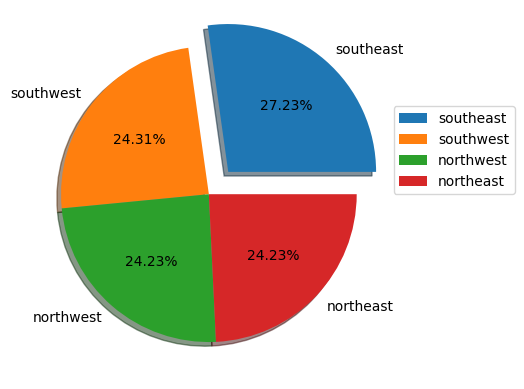

In [28]:
plt.pie(df['region'].value_counts(),labels=df['region'].value_counts().index, autopct="%1.2f%%",explode=(0.2,0,0,0),shadow=True);
plt.legend(loc=[1,0.5])
plt.show()

pie chart shows us the total percent of customer regionwise who are already have an medical insurance .

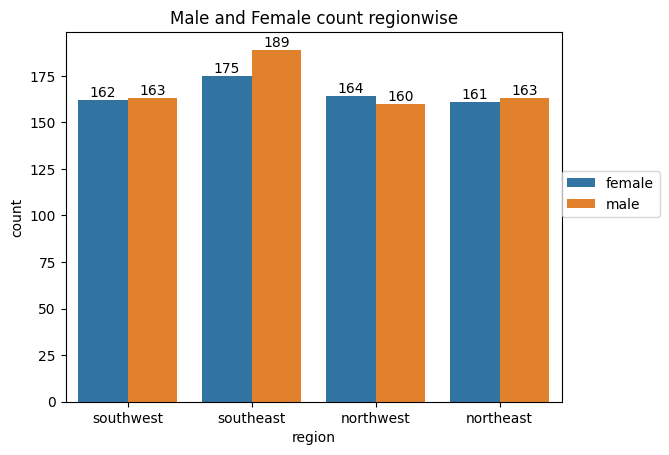

In [29]:
ax=sns.countplot(data=df,x='region',hue='sex');
plt.legend(loc=[1,0.5])
plt.title("Male and Female count regionwise")
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
Male and female both are equally applied for Medical Insurance in each Region

In [30]:
df.groupby('region').mean().T

region,northeast,northwest,southeast,southwest
age,39.268519,39.259259,38.939560,39.455385
bmi,29.173503,29.195494,33.355989,30.596615
children,1.046296,1.151235,1.049451,1.141538
charges,13406.384516,12450.840844,14735.411438,12346.937377


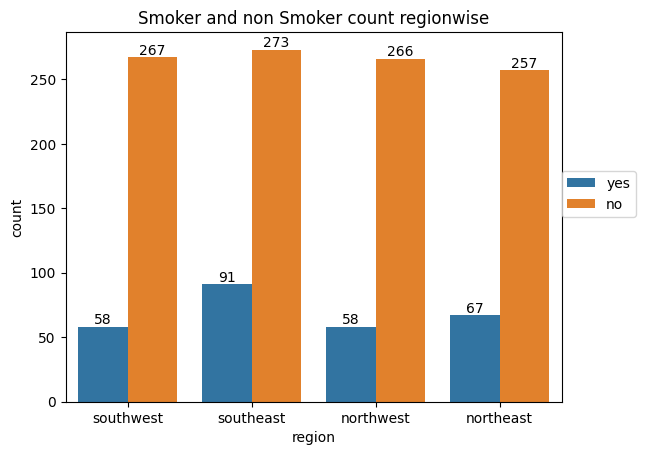

In [31]:
ax=sns.countplot(data=df,x='region',hue='smoker');
plt.legend(loc=[1,0.5])
plt.title("Smoker and non Smoker count regionwise")
for container in ax.containers:
    ax.bar_label(container)

# Childrens

#### Number of children covered by health insurance / Number of dependents

- 0 --> No. of Dependent Zero
- 1 --> No. of Dependent is One(Spouse/Children)
- 2 --> No. of Dependents are two 
- 3 --> No. of Dependents are three
- 4 --> No. of Dependents are Four
- 5 --> No. of Dependents are Five

In [40]:
df['children'].describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [39]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

- Customer with number of dependent equals to zero are more in count who are applied for insurance,then followed by one ,two upto five.
- Maximum Number of Dependent Covered in Insurance are five.

Text(0.5, 1.0, 'Percent of  Distribution of Number of Dependent')

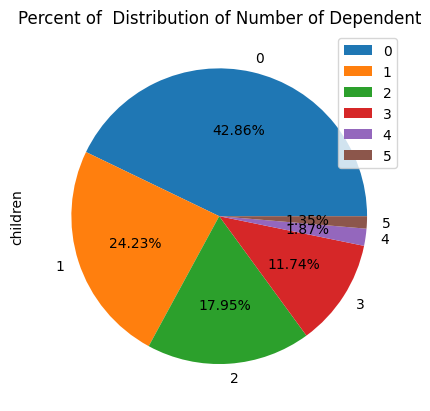

In [43]:
df['children'].value_counts().plot(kind='pie',autopct="%1.2f%%");
plt.legend()
plt.title('Percent of  Distribution of Number of Dependent')

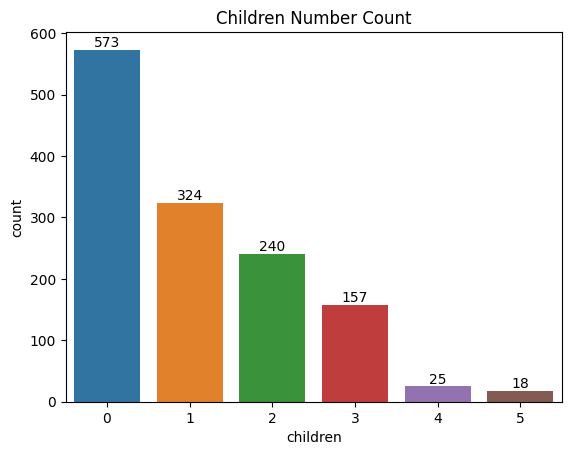

In [41]:
ax= sns.countplot(data=df,x=df['children'])
plt.title("Children Number Count")

for container in ax.containers:
    ax.bar_label(container)

# BMI

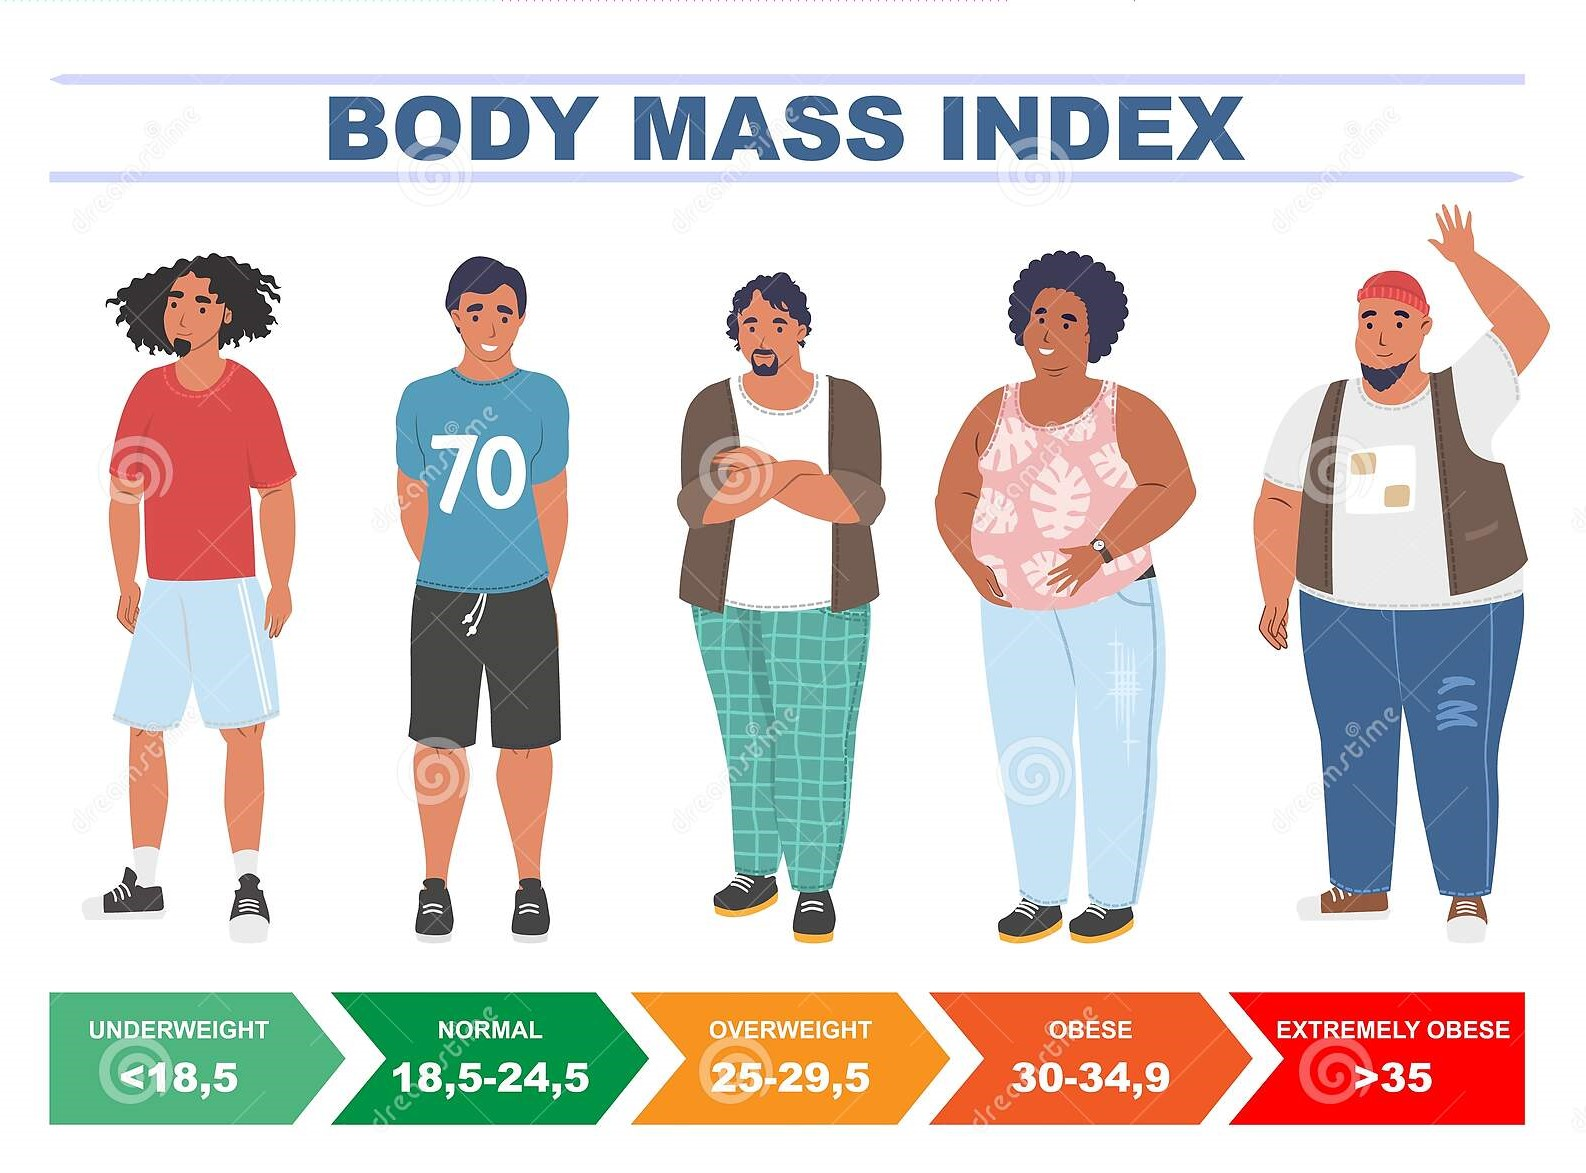

#### - Body Mass Index (BMI) is a person's weight in kilograms(kg) divided by the square of height in meters (m**2).

#### Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

In [44]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [45]:
df['bmi'].value_counts()

32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64

<AxesSubplot: xlabel='bmi', ylabel='Density'>

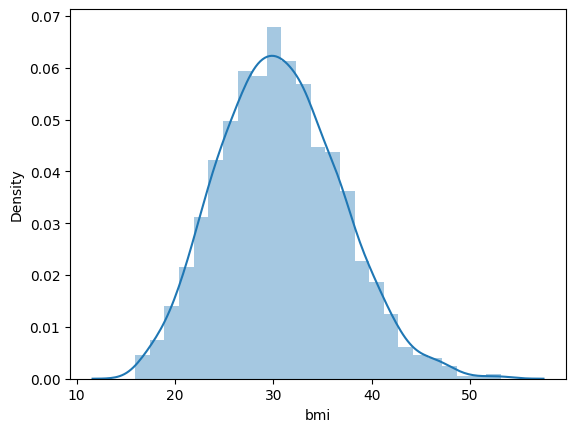

In [46]:
sns.distplot(df['bmi'])

The curve shows the density plot which is essentially a smooth version of the histogram. The y-axis is in terms of density and the histogram is normalized by default so that it has the same y-scale as the density plot.


<AxesSubplot: >

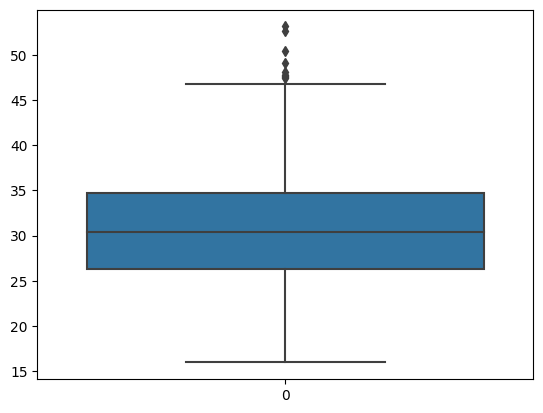

In [47]:
sns.boxplot(df['bmi'])

In [48]:
skew(df['bmi'])

0.2835955670169306

# charges

In [49]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot: xlabel='charges', ylabel='Density'>

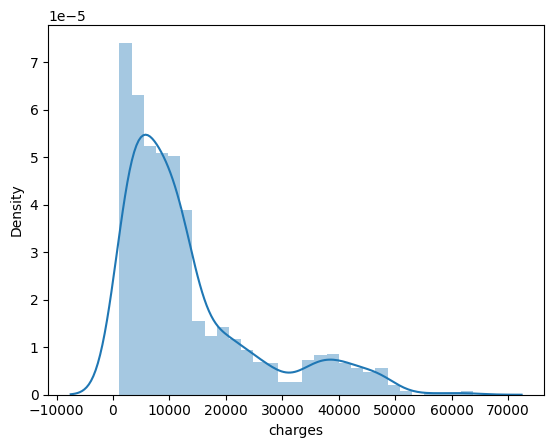

In [50]:
sns.distplot(df['charges'])

<AxesSubplot: >

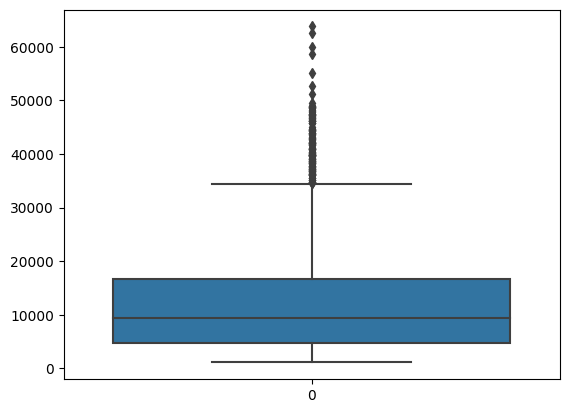

In [51]:
sns.boxplot(df['charges'])

In [52]:
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))

skew:  1.5136902413349014
kurtosis:  1.5937433292737193


Getting positive Skewness , it means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. *Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed. *If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

*So here My data is Highly Skewed. My Skew value is 1.51

# charges vs bmi

<AxesSubplot: xlabel='charges', ylabel='bmi'>

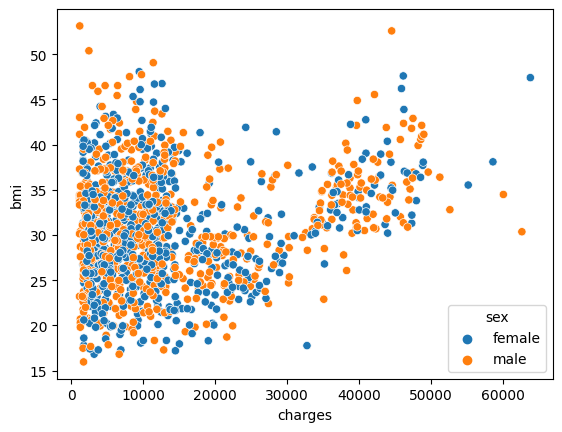

In [53]:
sns.scatterplot(x=df['charges'],y=df['bmi'],hue=df['sex'])

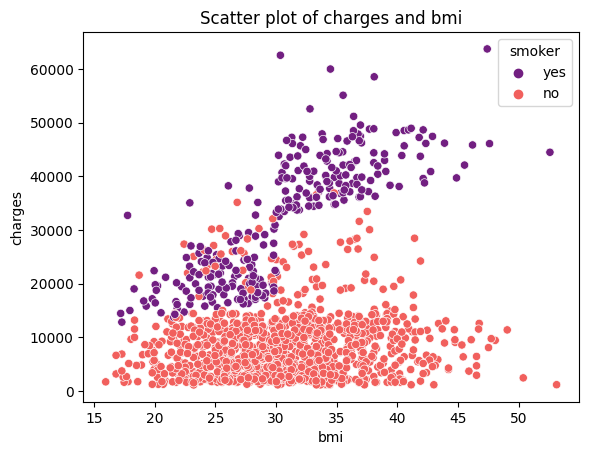

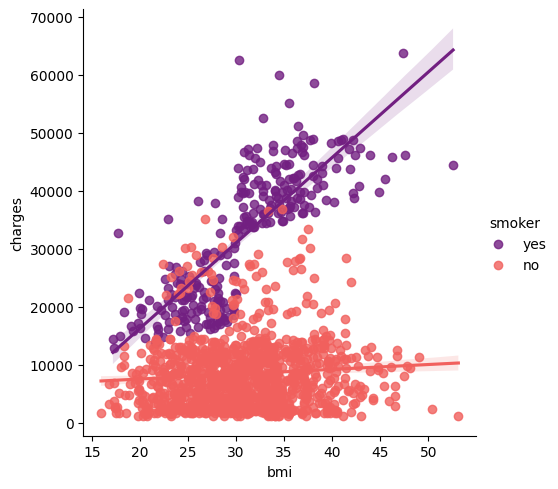

In [54]:
#plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
#plt.figure(figsize=(10,6))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')

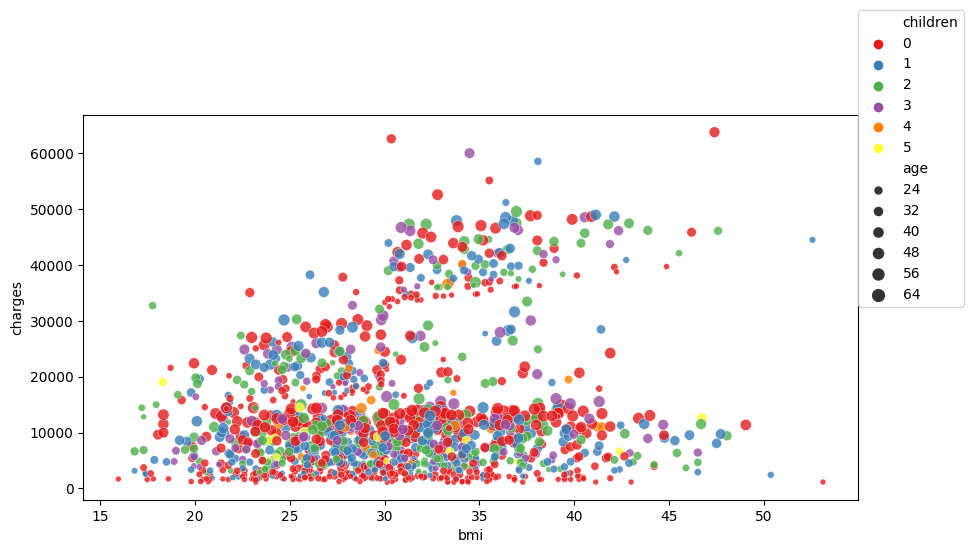

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,y='charges',x='bmi',hue='children',palette='Set1',alpha=0.8,size='age');
plt.legend(loc=(1,0.5))

# Charges VS Region

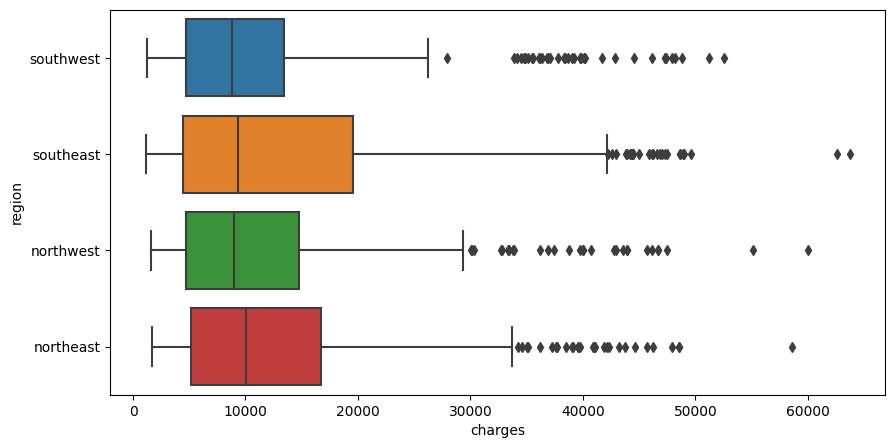

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='charges',y='region',data=df);

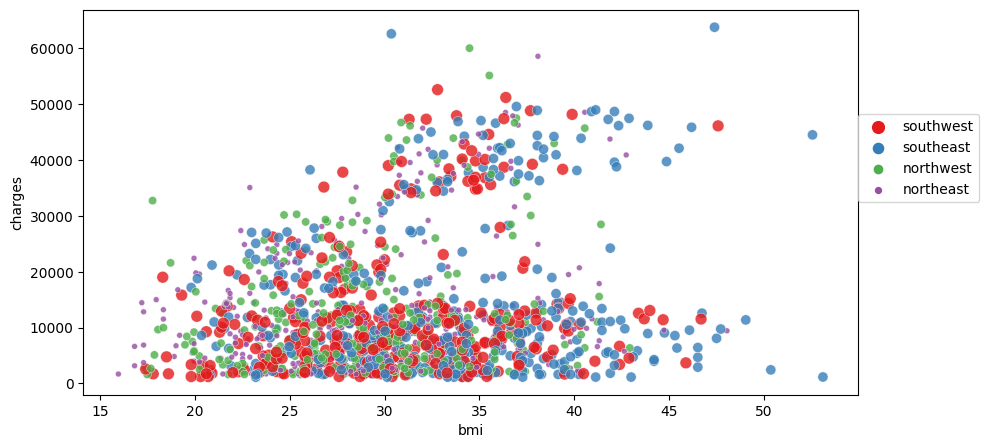

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,y='charges',x='bmi',hue='region',palette='Set1',alpha=0.8,size='region');
plt.legend(loc=(1,0.5))

# Charges vs Age

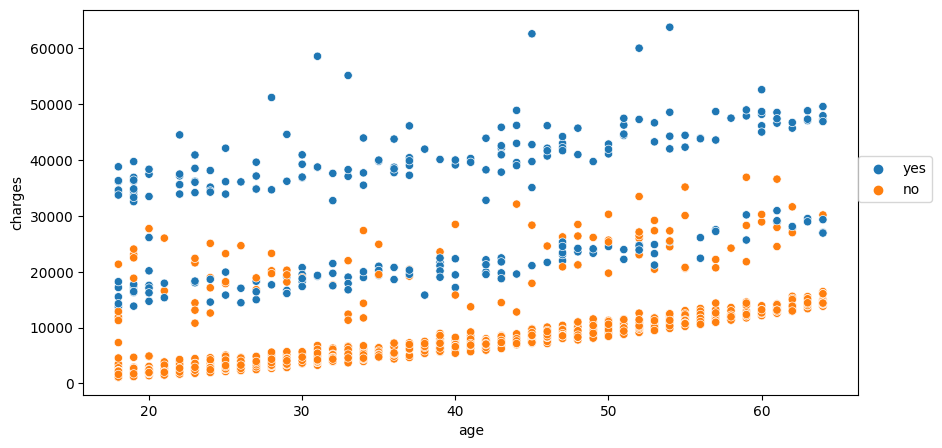

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,y='charges',x='age',hue="smoker")
plt.legend(loc=(1,0.5))

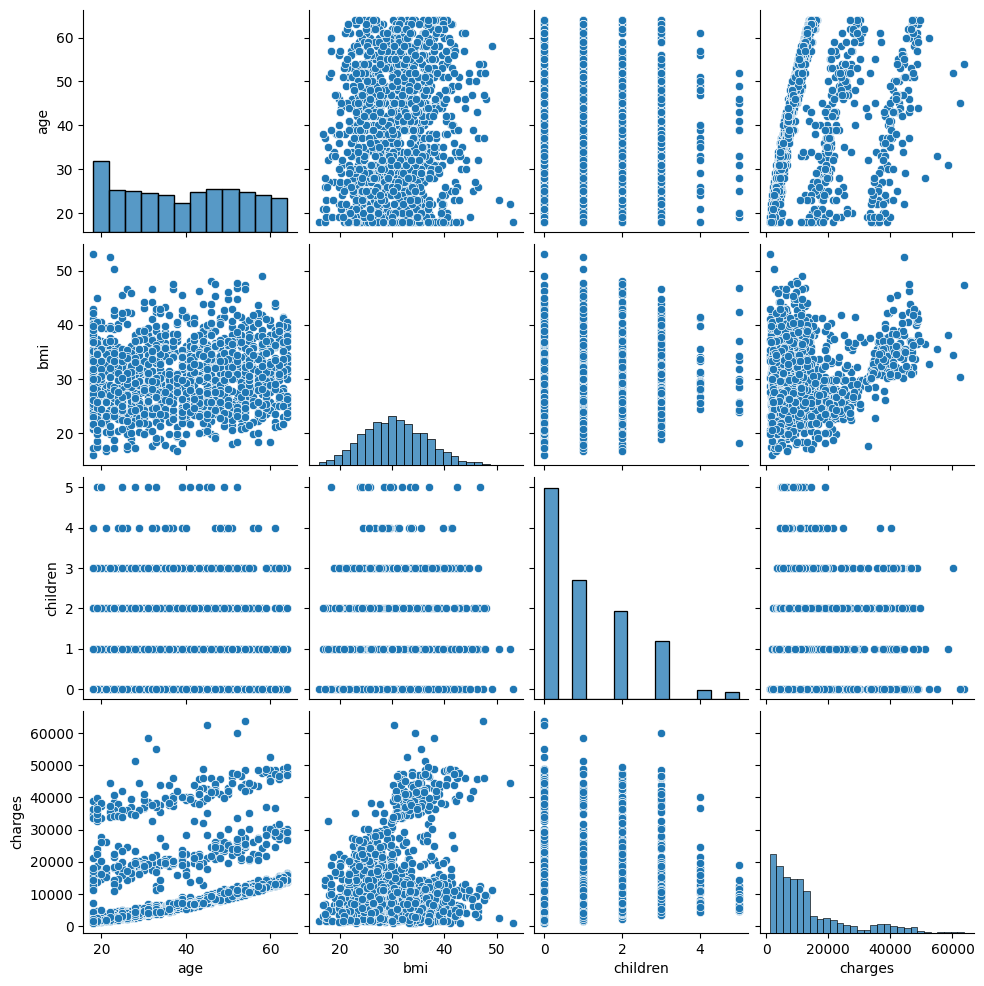

In [59]:
sns.pairplot(df)

# Encoding

In [60]:
df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [61]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [62]:
df[['sex', 'smoker', 'region']]=oe.fit_transform(df[['sex', 'smoker', 'region']])

In [63]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [64]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [65]:
df.cov()

,age,sex,bmi,children,smoker,region,charges
age,197.243282,-0.139180,9.368233,0.703268,-0.145109,0.025243,5.073683e+04
sex,-0.139180,0.250163,0.141568,0.010762,0.015470,0.002729,3.515848e+02
bmi,9.368233,0.141568,37.215715,0.093805,0.009228,1.062413,1.465763e+04
children,0.703268,0.010762,0.093805,1.453402,0.003569,0.021663,9.838780e+02
smoker,-0.145109,0.015470,0.009228,0.003569,0.163059,-0.001052,3.849764e+03
region,0.025243,0.002729,1.062413,0.021663,-0.001052,1.221485,-8.762227e+01
charges,50736.833698,351.584753,14657.628526,983.878025,3849.763649,-87.622268,1.466608e+08


<AxesSubplot: >

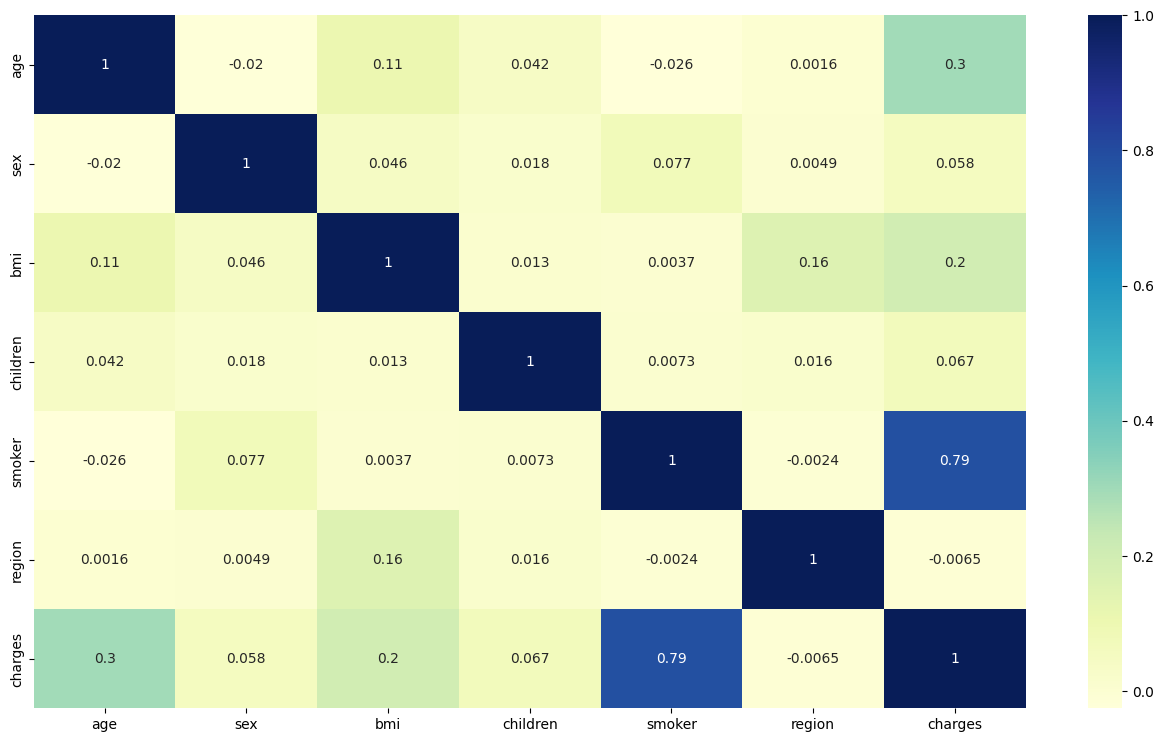

In [66]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

- Smoker,Age & sex shows an Strong Positive Correlation with Insurance Charge, Which means one unit changes in this features corresponding change in Insurance Charges.
- This are the more important Feature Among all.
- Region is the only one  Show an Weak Neagtive Correlation with Charges.

<AxesSubplot: title={'center': 'Correlation with charges'}>

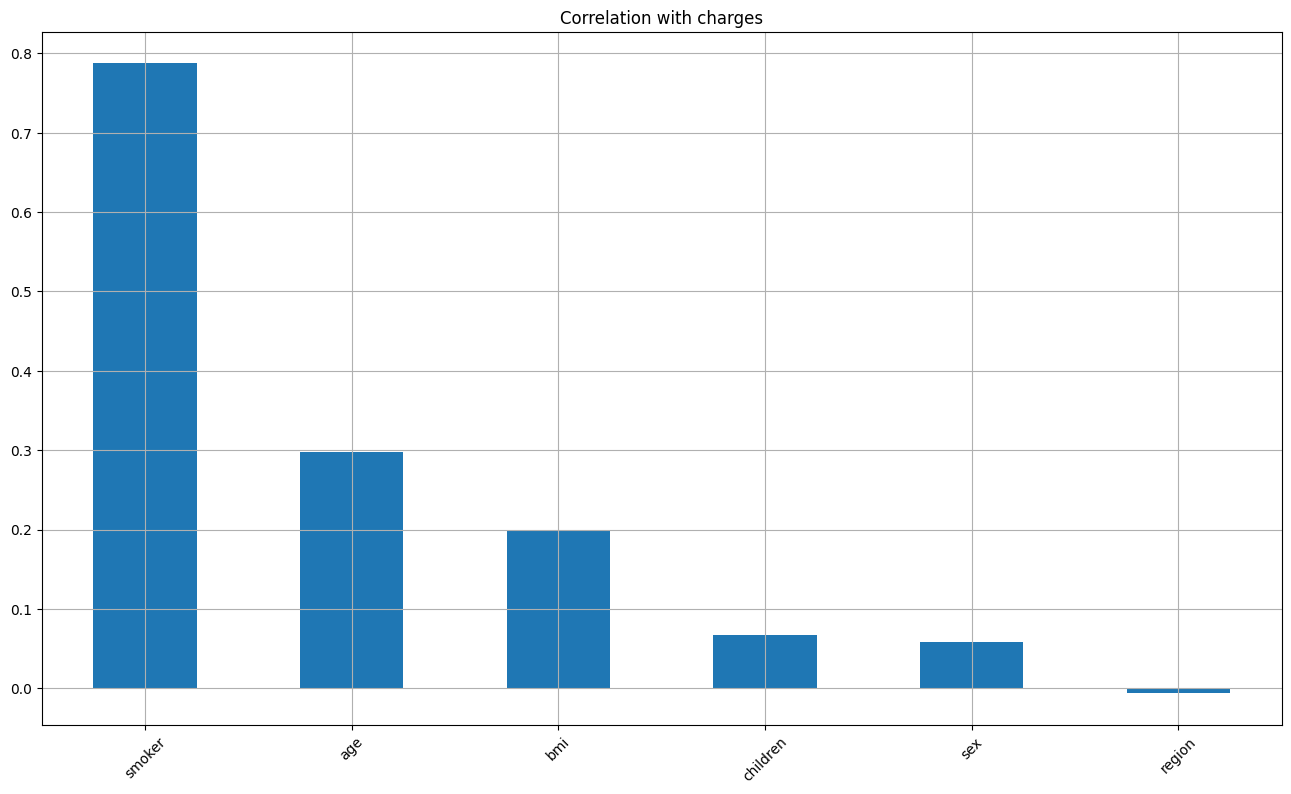

In [67]:
df_2 = df.drop(columns='charges')

df_2.corrwith(df['charges']).sort_values(ascending=False).plot.bar(
    figsize=(16,9), title = 'Correlation with charges', 
    rot = 45, grid = True
)

In [68]:
df_2.corrwith(df['charges']).sort_values(ascending=False)

smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
dtype: float64

Charge column is higly correlated with Smoker

and negatively correlated with region

## Spliting dataset

In [69]:
# matrix of features / inependent variables
x = df.drop(columns='charges')
y=df['charges']

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,random_state=42)

# BaseModel

# LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,make_scorer

In [73]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
ypred=linreg.predict(x_test)

## Model Evaluation

In [74]:
mae=mean_absolute_error(y_test,ypred)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
R2score=r2_score(y_test,ypred)

In [75]:
print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')

Mean Absolute Error:--4191.839932691661
Root Mean Square Error:--6208.768186485854
R2 Score:--0.7733763084200891


In [76]:
df.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

LinearRegression Model Show 77% accuracy but it shows too large root mean Square value as comapred to mean value of insurance.

# Residue Plot

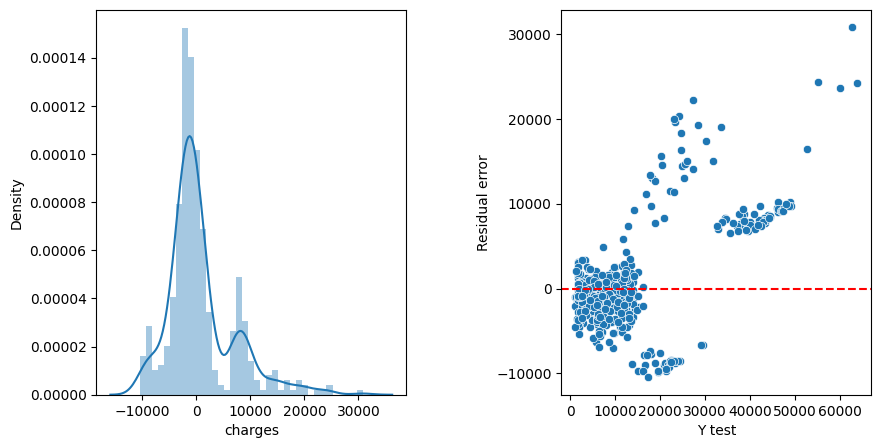

In [77]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=y_test,y= residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Y test')
axes[1].set_ylabel('Residual error')
fig.subplots_adjust(wspace=0.5)

### Requriment
1) Residual error of model should be Normally distributed
2) Scatter Plot of Residual error must show Scatteredness in error 

# Polynamial

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size = 0.33,random_state=42)
linregp=LinearRegression()
linregp.fit(xp_train,yp_train)
ypred=linregp.predict(xp_test)

In [80]:
mae=mean_absolute_error(yp_test,ypred,)
rmse=np.sqrt(mean_absolute_error(yp_test,ypred,))
R2score=r2_score(yp_test,ypred)

print(f'Mean Absolute Error:= {mae}')
print(f'Root Mean Square Error:= {rmse}')
print(f'R2 Score:= {R2score}')
print()
train=linregp.score(xp_train,yp_train)
test=linregp.score(xp_test,yp_test)
print(f'Train:-{train}')
print(f'Test:-{test}')


Mean Absolute Error:= 2953.625546256687
Root Mean Square Error:= 54.34726806617502
R2 Score:= 0.8553301106446514

Train:-0.8384358411274471
Test:-0.8553301106446514


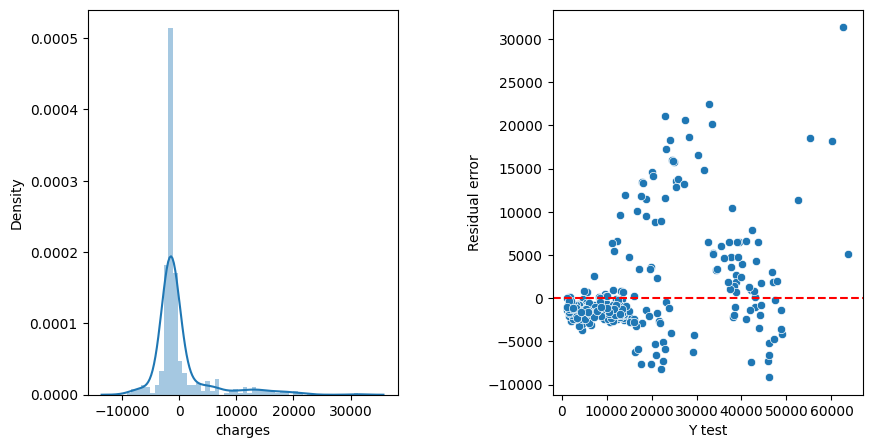

In [81]:
residue =yp_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=yp_test,y= residue,ax=axes[1])
axes[1].set_xlabel('Y test')
axes[1].set_ylabel('Residual error')
plt.axhline(y=0, color='r', linestyle='--')
fig.subplots_adjust(wspace=0.5)

In [82]:
train=linregp.score(xp_train,yp_train)
test=linregp.score(xp_test,yp_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Train:-0.8384358411274471
Test:-0.8553301106446514


# Scaling Data

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_xtrain=scaler.fit_transform(x_train)
Scaled_xtest=scaler.transform(x_test)

## LinearRegression With Scaling

In [84]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(Scaled_xtrain,y_train)
ypred=linreg.predict(Scaled_xtest)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train=linreg.score(Scaled_xtrain,y_train)
test=linreg.score(Scaled_xtest,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')



Mean Absolute Error:--4191.83993269166
Root Mean Square Error:--64.7444200892375
R2 Score:--0.7733763084200891

Train:-0.7327892492623203
Test:-0.7733763084200891


Mean Absolute Error:--2953.6255462566696
Root Mean Square Error:--54.34726806617486
R2 Score:--0.8553301106446515

Train:-0.8384358411274471
Test:-0.8553301106446515


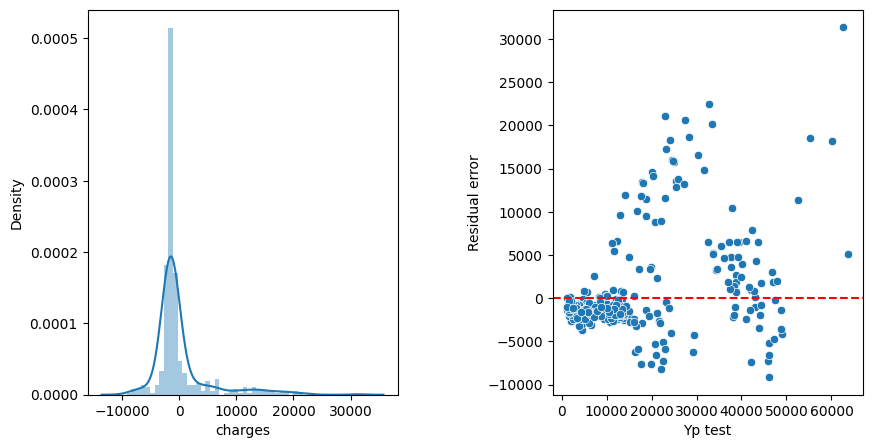

In [85]:
poly=PolynomialFeatures(degree=2)

x_poly=poly.fit_transform(x)
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size = 0.33,random_state=42)
xp_train=scaler.fit_transform(xp_train)
xp_test=scaler.transform(xp_test)

linreg.fit(xp_train,yp_train)
ypred=linreg.predict(xp_test)


mae=mean_absolute_error(yp_test,ypred,)
rmse=np.sqrt(mean_absolute_error(yp_test,ypred))
R2score=r2_score(yp_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train=linreg.score(xp_train,yp_train)
test=linreg.score(xp_test,yp_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

residue =yp_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=yp_test,y= residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Yp test')
axes[1].set_ylabel('Residual error')
fig.subplots_adjust(wspace=0.5)

# Randomforest

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr=RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
rfr.fit(x_train,y_train)
ypred=rfr.predict(x_test)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train=rfr.score(x_train,y_train)
test=rfr.score(x_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')


Mean Absolute Error:--2595.214449075566
Root Mean Square Error:--50.9432473353983
R2 Score:--0.8642882806619437

Train:-0.9754774633596368
Test:-0.8642882806619437


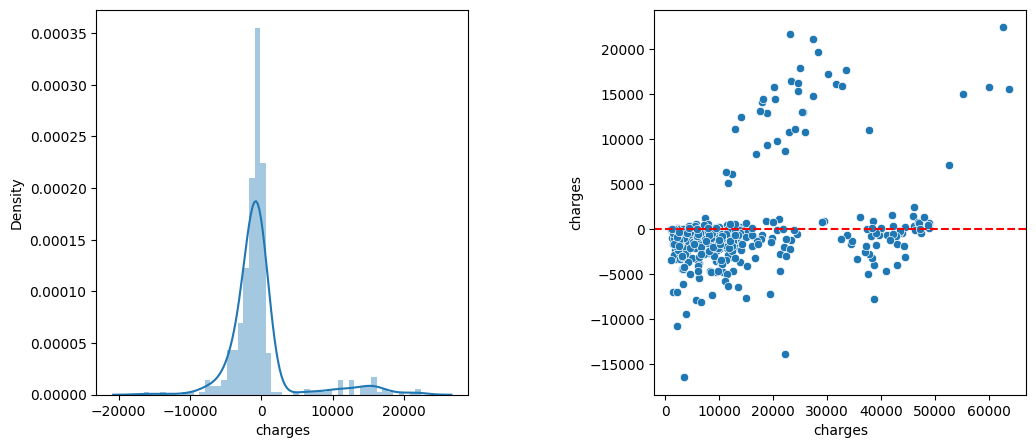

In [88]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(12,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot( x=y_test,y=residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
fig.subplots_adjust(wspace=0.5)

# RandomForestRegressor with Scaling

In [165]:
rfrsc=RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

rfrsc.fit(Scaled_xtrain,y_train)
ypred=rfrsc.predict(Scaled_xtest)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)
print()
print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')

train=rfr.score(Scaled_xtrain,y_train)
test=rfr.score(Scaled_xtest,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')



Mean Absolute Error:--2598.9920911717195
Root Mean Square Error:--50.9803108187045
R2 Score:--0.8638450579514977
Train:-0.9755675978745685
Test:-0.8638450579514977


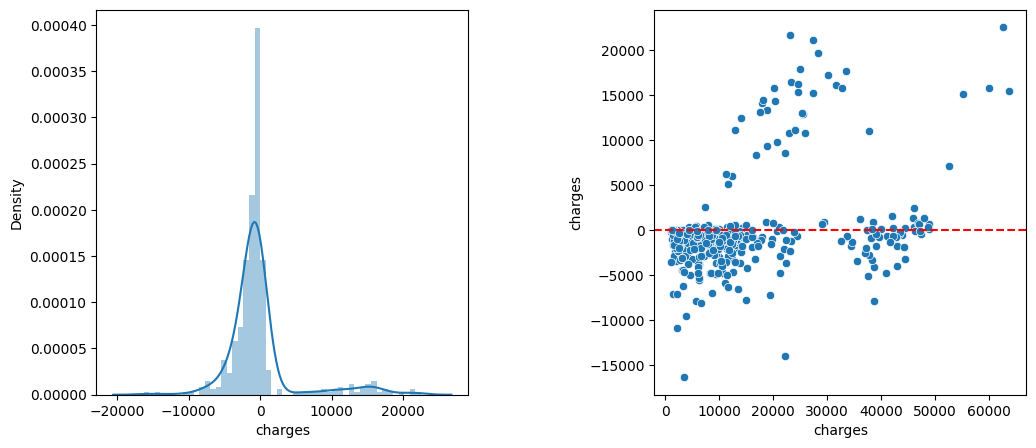

In [90]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(12,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot( x=y_test,y=residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
fig.subplots_adjust(wspace=0.5)

## Ridge

In [91]:
from sklearn.linear_model import Ridge,Lasso

l2 = Ridge(alpha=8,)
l2.fit(x_train,y_train)
ypred = l2.predict(x_test)
r2=r2_score(y_test,ypred)
print(f"R2_Score:-{r2}")


train = l2.score(x_train,y_train)
test = l2.score(x_test,y_test)
print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

R2_Score:-0.7644043736521886
Training Result :- 0.7311071886164099
Testing Result :- 0.7644043736521886


In [92]:
for i in  [0.01, 0.1, 1, 10, 100]:
    l2 = Ridge(alpha=i)
    l2.fit(x_train,y_train)
    
    train = l2.score(x_train,y_train)
    test = l2.score(x_test,y_test)
    
    print(f"{i}  :--{train} {test}")

0.01  :--0.7327892463382344 0.7733662111060777
0.1  :--0.7327889572143419 0.7732751920687034
1  :--0.7327604014180998 0.7723510574626299
10  :--0.7302280521004167 0.761925469958726
100  :--0.6298029631622295 0.6328109591845413


## Lasso

In [93]:
#lasso
from sklearn.linear_model import LassoCV

l1=LassoCV()
l1.fit(x_train,y_train)
ypred = l1.predict(x_test)
r2=r2_score(y_test,ypred)
print(f"R2_Score:-{r2}")


train = l2.score(x_train,y_train)

test = l2.score(x_test,y_test)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

R2_Score:-0.7710653397255254
Training Result :- 0.6298029631622295
Testing Result :- 0.6328109591845413


## RandomForestRegressor With GridSerchCV

In [94]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

# Define the hyperparameters to be tuned
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
scorer = make_scorer(r2_score)
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, params, cv=5, n_jobs=-1,verbose=True,scoring=scorer)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(r2_score), verbose=True)

In [95]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [96]:
ypred=grid_search.predict(x_test)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)
print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train = grid_search.score(x_train,y_train)
test = grid_search.score(x_test,y_test)
print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")


Mean Absolute Error:--2489.253095618328
Root Mean Square Error:--49.89241521131572
R2 Score:--0.8770958466243814

Training Result :- 0.8804851434042176
Testing Result :- 0.8770958466243814


# xgboost

In [97]:
import xgboost as xgb

In [98]:
model= xgb.XGBRFRegressor()
model.fit(x_train,y_train)

ypred=model.predict(x_test)

mae=mean_absolute_error(y_test,ypred)
rmse=np.sqrt(mean_absolute_error(y_test,ypred))
R2score=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')

train = model.score(x_train,y_train)
test = model.score(x_test,y_test)
print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")


Mean Absolute Error:--2529.8908712875073
Root Mean Square Error:--50.298020550390525
R2 Score:--0.8750698129008965
Training Result :- 0.902341903709978
Testing Result :- 0.8750698129008965


#### RandomForestRegressor perfrom well among all regression model
- the best parameter for RandomForestRegressor are as follows:
-{'max_depth': 5,
-'max_features': None,
-'min_samples_leaf': 4,
-'min_samples_split': 2,
-'n_estimators': 200}

# Final Model

In [174]:
final_model=RandomForestRegressor(max_depth= 5,max_features= None,min_samples_leaf =4,min_samples_split=2,n_estimators=200)
final_model.fit(x_train,y_train)
ypred=final_model.predict(x_test)

mae=mean_absolute_error(y_test,ypred,)
rmse=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score=r2_score(y_test,ypred)
print(f'Mean Absolute Error:--{mae}')
print(f'Root Mean Square Error:--{rmse}')
print(f'R2 Score:--{R2score}')
print()
train = grid_search.score(x_train,y_train)
test = grid_search.score(x_test,y_test)
print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")


Mean Absolute Error:--2491.9478767805663
Root Mean Square Error:--49.919413826492054
R2 Score:--0.8774607191406627

Training Result :- 0.8804851434042176
Testing Result :- 0.8770958466243814


In [175]:
def PredictCharges():
    age=int(input("Enter Your Age:- "))
    sex=input("Enter Your Gender(male/female):- ")
    bmi=float(input("Enter Your Body Mass Index:- "))
    depend= int(input("Enter No. Of people Depend on You:- "))
    smoker=input("DO You smoke(yes/no):- ")
    print()
    print("""'southeast', 'southwest', 
             'northwest', 'northeast' """)
    region=input("Enter You are from Which Region of US:-")
    
    newob = [[age,sex.lower(),bmi,depend,smoker.lower(),region.lower()]]
    newob[0][1],newob[0][-2],newob[0][-1]=oe.transform([[newob[0][1],newob[0][-2],newob[0][-1]]])[0]
    
    yp=final_model.predict(newob)
    print(f"The Price Of Your Medical Insurance Premium $ {yp[0]}")
    return yp
    

In [169]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [170]:
oe.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [171]:
PredictCharges()

Enter Your Age:- 32
Enter Your Gender(male/female):- male
Enter Your Body Mass Index:- 28.880
Enter No. Of people Depend on You:- 0
DO You smoke(yes/no):- no

'southeast', 'southwest', 
             'northwest', 'northeast' 
Enter You are from Which Region of US:-northwest
The Price Of Your Medical Insurance Premium $ 4854.912004731419


array([4854.91200473])

In [176]:
from joblib import dump, load

In [177]:
dump(final_model, 'Insurance_model.joblib') 

['Insurance_model.joblib']